In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree

# Step 1: Business Understanding
print("Goal: Analyze COVID-19 data for death rates, infection rates, and vaccination coverage.")

# Step 2: Data Understanding
# Load the dataset (assuming a CSV format with relevant data columns)
df = pd.read_csv('D:/Data Analytics/CovidDeaths.csv')  # Replace 'covid_data.csv' with your dataset's filename

# Overview of the data
print("Dataset Overview:")
print(df.head())
print(df.info())


Goal: Analyze COVID-19 data for death rates, infection rates, and vaccination coverage.
Dataset Overview:
  iso_code continent     location        date  population  total_cases  \
0      AFG      Asia  Afghanistan  2020-01-05    41128772          0.0   
1      AFG      Asia  Afghanistan  2020-01-06    41128772          0.0   
2      AFG      Asia  Afghanistan  2020-01-07    41128772          0.0   
3      AFG      Asia  Afghanistan  2020-01-08    41128772          0.0   
4      AFG      Asia  Afghanistan  2020-01-09    41128772          0.0   

   new_cases  new_cases_smoothed  total_deaths  new_deaths  ...  \
0        0.0                 NaN           0.0         0.0  ...   
1        0.0                 NaN           0.0         0.0  ...   
2        0.0                 NaN           0.0         0.0  ...   
3        0.0                 NaN           0.0         0.0  ...   
4        0.0                 NaN           0.0         0.0  ...   

   new_deaths_smoothed_per_million  reproducti

In [2]:
# Step 2: Exploratory Data Analysis (EDA)
print("Initial Data Overview:")
print(df.head())

Initial Data Overview:
  iso_code continent     location        date  population  total_cases  \
0      AFG      Asia  Afghanistan  2020-01-05    41128772          0.0   
1      AFG      Asia  Afghanistan  2020-01-06    41128772          0.0   
2      AFG      Asia  Afghanistan  2020-01-07    41128772          0.0   
3      AFG      Asia  Afghanistan  2020-01-08    41128772          0.0   
4      AFG      Asia  Afghanistan  2020-01-09    41128772          0.0   

   new_cases  new_cases_smoothed  total_deaths  new_deaths  ...  \
0        0.0                 NaN           0.0         0.0  ...   
1        0.0                 NaN           0.0         0.0  ...   
2        0.0                 NaN           0.0         0.0  ...   
3        0.0                 NaN           0.0         0.0  ...   
4        0.0                 NaN           0.0         0.0  ...   

   new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
0                              NaN                NaN     

In [3]:
# Step 2: Exploratory Data Analysis (EDA)
print("Initial Data Overview:")
print(df.head())

Initial Data Overview:
  iso_code continent     location        date  population  total_cases  \
0      AFG      Asia  Afghanistan  2020-01-05    41128772          0.0   
1      AFG      Asia  Afghanistan  2020-01-06    41128772          0.0   
2      AFG      Asia  Afghanistan  2020-01-07    41128772          0.0   
3      AFG      Asia  Afghanistan  2020-01-08    41128772          0.0   
4      AFG      Asia  Afghanistan  2020-01-09    41128772          0.0   

   new_cases  new_cases_smoothed  total_deaths  new_deaths  ...  \
0        0.0                 NaN           0.0         0.0  ...   
1        0.0                 NaN           0.0         0.0  ...   
2        0.0                 NaN           0.0         0.0  ...   
3        0.0                 NaN           0.0         0.0  ...   
4        0.0                 NaN           0.0         0.0  ...   

   new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
0                              NaN                NaN     

In [4]:
print(df.describe())

         population   total_cases     new_cases  new_cases_smoothed  \
count  4.294350e+05  4.118040e+05  4.101590e+05        4.089290e+05   
mean   1.520336e+08  7.365292e+06  8.017360e+03        8.041026e+03   
std    6.975408e+08  4.477582e+07  2.296649e+05        8.661611e+04   
min    4.700000e+01  0.000000e+00  0.000000e+00        0.000000e+00   
25%    5.237980e+05  6.280750e+03  0.000000e+00        0.000000e+00   
50%    6.336393e+06  6.365300e+04  0.000000e+00        1.200000e+01   
75%    3.296952e+07  7.582720e+05  0.000000e+00        3.132900e+02   
max    7.975105e+09  7.758668e+08  4.423623e+07        6.319461e+06   

       total_deaths     new_deaths  new_deaths_smoothed  \
count  4.118040e+05  410608.000000        409378.000000   
mean   8.125957e+04      71.852139            72.060828   
std    4.411901e+05    1368.322990           513.636565   
min    0.000000e+00       0.000000             0.000000   
25%    4.300000e+01       0.000000             0.000000   
50%   

In [5]:

plt.figure(figsize=(10, 6))
df.corr()

C:\Users\hp\AppData\Local\Temp\ipykernel_66312\483320238.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
population,1.000000,0.690212,0.148152,0.393991,0.756059,0.215584,0.575989,-0.067982,-0.007989,-0.021596,...,-0.016940,0.045240,0.653356,0.062753,0.701951,-0.007080,0.569955,0.050899,0.742360,0.079095
total_cases,0.690212,1.000000,0.127604,0.338784,0.945601,0.099206,0.264516,0.068821,-0.000352,-0.001058,...,-0.012079,0.019600,0.299789,-0.071282,0.432734,-0.055302,0.127881,-0.169915,0.463545,-0.019464
new_cases,0.148152,0.127604,1.000000,0.376576,0.156200,0.505723,0.188546,-0.000879,0.096615,0.030689,...,0.016207,0.009400,0.225192,0.071132,0.278640,0.070197,0.176549,0.077636,0.264411,0.131233
new_cases_smoothed,0.393991,0.338784,0.376576,1.000000,0.414728,0.187672,0.500685,-0.002534,0.030186,0.081496,...,0.043039,0.022307,0.622966,0.191382,0.771144,0.196585,0.511579,0.200610,0.741420,0.347745
total_deaths,0.756059,0.945601,0.156200,0.414728,1.000000,0.162214,0.432634,0.032414,-0.000895,-0.002536,...,0.003908,0.025423,0.429377,0.003424,0.516279,-0.032690,0.269535,-0.108156,0.569060,0.023550
new_deaths,0.215584,0.099206,0.505723,0.187672,0.162214,1.000000,0.374816,-0.017114,0.048619,0.008880,...,0.045682,0.011224,0.324983,0.133591,0.324683,0.096474,0.240436,0.171162,0.310657,0.133296
new_deaths_smoothed,0.575989,0.264516,0.188546,0.500685,0.432634,0.374816,1.000000,-0.045994,0.008776,0.023691,...,0.121882,0.027426,0.894471,0.346088,0.889325,0.243546,0.724732,0.432689,0.856174,0.337601
total_cases_per_million,-0.067982,0.068821,-0.000879,-0.002534,0.032414,-0.017114,-0.045994,1.000000,0.049553,0.133381,...,-0.007761,-0.038958,-0.110012,-0.251946,-0.059091,-0.124671,-0.267368,-0.374204,-0.086137,-0.133618
new_cases_per_million,-0.007989,-0.000352,0.096615,0.030186,-0.000895,0.048619,0.008776,0.049553,1.000000,0.370409,...,0.090855,0.034799,0.014751,0.081624,0.029828,0.125208,0.000740,0.152705,0.002352,0.212606
new_cases_smoothed_per_million,-0.021596,-0.001058,0.030689,0.081496,-0.002536,0.008880,0.023691,0.133381,0.370409,1.000000,...,0.245277,0.068487,0.061544,0.213352,0.102726,0.355701,0.255410,0.280663,0.116512,0.466364


<Figure size 1000x600 with 0 Axes>

In [6]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'population',
       'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million'],
      dtype='object')

In [7]:
df.corr()[df.corr() > 0.7]

C:\Users\hp\AppData\Local\Temp\ipykernel_66312\3479916633.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[df.corr() > 0.7]


,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
population,1.000000,NaN,NaN,NaN,0.756059,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.701951,NaN,NaN,NaN,0.742360,NaN
total_cases,NaN,1.000000,NaN,NaN,0.945601,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases_smoothed,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.771144,NaN,NaN,NaN,0.741420,NaN
total_deaths,0.756059,0.945601,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_deaths,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_deaths_smoothed,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,0.894471,NaN,0.889325,NaN,0.724732,NaN,0.856174,NaN
total_cases_per_million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases_per_million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases_smoothed_per_million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\hp\AppData\Local\Temp\ipykernel_66312\2299866349.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


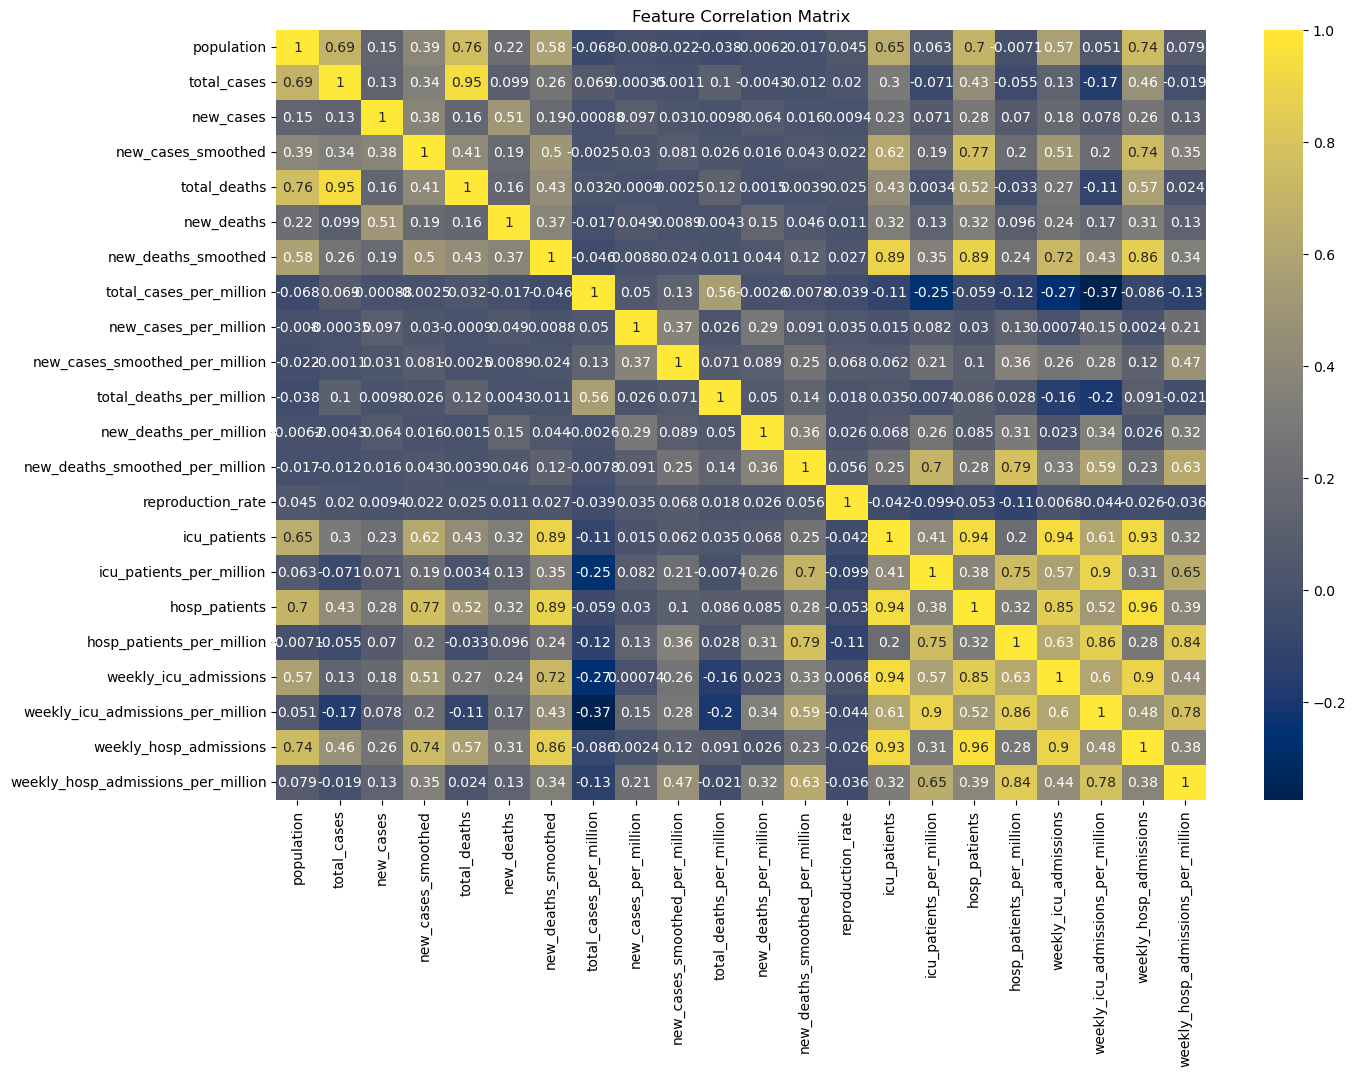

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='cividis') #inferno #plasma #viridis 
plt.title('Feature Correlation Matrix')
plt.show()

In [9]:

# Columns with NaN values to be cleaned
columns_to_clean = [
    'new_deaths', 'new_deaths_smoothed_per_million',
    'reproduction_rate', 'icu_patients', 'icu_patients_per_million',
    'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions',
    'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
    'weekly_hosp_admissions_per_million','total_cases', 'total_deaths','new_cases','total_cases'
]

# Replace NaN values with the median of each column
for col in columns_to_clean:
    df[col].fillna(df[col].median(), inplace=True)

# Verify that there are no NaN values left in these columns
print(df[columns_to_clean].isnull().sum())

new_deaths                            0
new_deaths_smoothed_per_million       0
reproduction_rate                     0
icu_patients                          0
icu_patients_per_million              0
hosp_patients                         0
hosp_patients_per_million             0
weekly_icu_admissions                 0
weekly_icu_admissions_per_million     0
weekly_hosp_admissions                0
weekly_hosp_admissions_per_million    0
total_cases                           0
total_deaths                          0
new_cases                             0
total_cases                           0
dtype: int64


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Load your data (replace with actual data loading method)
# df = pd.read_csv('your_data.csv')

# Define features (X) and targets (y)
X = df[['total_deaths', 'total_cases', 'hosp_patients']]  # Features
y_total_cases = df['icu_patients']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_total_cases, test_size=0.3, random_state=42)

# Initialize the model (Linear Regression in this case)
model = LinearRegression()

# Bootstrap resampling method
n_iterations = 1000  # Number of resampling iterations
bootstrap_results = []

for i in range(n_iterations):
    # Bootstrap resampling: random sampling with replacement
    X_resampled, y_resampled = resample(X_train, y_train, random_state=i)
    
    # Train model on resampled data
    model.fit(X_resampled, y_resampled)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model using R^2 and Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    bootstrap_results.append((mse, r2))

# Convert results to DataFrame for analysis
bootstrap_results_df = pd.DataFrame(bootstrap_results, columns=['MSE', 'R2'])

# Print the mean and standard deviation of the results
print("Bootstrap Resampling Results:")
print(f"Mean MSE: {bootstrap_results_df['MSE'].mean()}")
print(f"Standard Deviation of MSE: {bootstrap_results_df['MSE'].std()}")
print(f"Mean R2: {bootstrap_results_df['R2'].mean()}")
print(f"Standard Deviation of R2: {bootstrap_results_df['R2'].std()}")

Bootstrap Resampling Results:
Mean MSE: 104778.39220693508
Standard Deviation of MSE: 220.80383667627524
Mean R2: 0.7878214541687826
Standard Deviation of R2: 0.0004471326195519221


The results from your Bootstrap resampling are as follows:

Mean MSE (Mean Squared Error): 104778.39
Standard Deviation of MSE: 220.80
Mean R² (R-squared): 0.788
Standard Deviation of R²: 0.00045
Interpretation:
Mean MSE (104778.39):

The mean MSE represents the average squared difference between the observed actual outcomes and the predicted outcomes. A lower MSE indicates better model performance. While the absolute value depends on the scale of your data, you generally want the MSE to be as small as possible. The smaller the MSE, the better the model's predictions.
Standard Deviation of MSE (220.80):

This value shows the variability of the MSE across different bootstrap iterations. A lower standard deviation suggests that the model’s performance is stable across resampling. The relatively low value here indicates that the model's performance doesn't fluctuate wildly across the resampled datasets, which is a good sign.
Mean R² (0.788):

R² represents the proportion of variance in the target variable (y_total_cases) that can be explained by the features in the model. A value of 0.788 means the model explains about 78.8% of the variance in the target variable. In most cases, an R² value closer to 1 indicates a better fit, but this value is already quite good depending on the domain.
Standard Deviation of R² (0.00045):

The very low standard deviation of R² means the model's goodness of fit is consistent across the resampling iterations, showing that your model is stable and reliable in predicting y_total_cases.
Conclusion:
Performance: Your model's performance seems quite good, with an R² of around 0.788, indicating that it explains nearly 79% of the variance in total_cases. The low standard deviation for both MSE and R² suggests that the model's performance is stable across different resampled datasets.
Next Steps:
If you are satisfied with this level of performance, you could explore further model tuning (e.g., adjusting hyperparameters) or try more complex models (e.g., Random Forest, XGBoost, etc.) to see if the performance can be further improved.
You might also consider adding more features or transforming existing ones (e.g., adding interaction terms or polynomial features) if you believe the model could benefit from additional information.

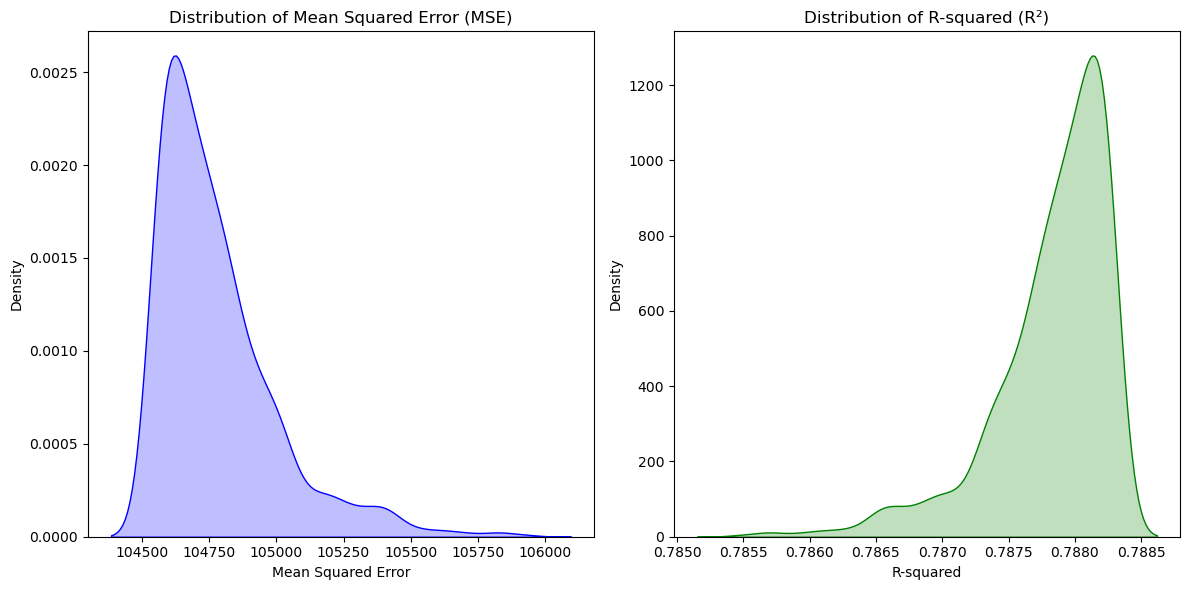

In [11]:
#Code for plotting Bootstrap results:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert bootstrap results to a DataFrame for easy plotting
bootstrap_results_df = pd.DataFrame(bootstrap_results, columns=['MSE', 'R2'])

# Plotting MSE distribution
plt.figure(figsize=(12, 6))

# Plot MSE distribution (Kernel density estimate)
plt.subplot(1, 2, 1)
sns.kdeplot(bootstrap_results_df['MSE'], fill=True, color='blue')
plt.title('Distribution of Mean Squared Error (MSE)')
plt.xlabel('Mean Squared Error')
plt.ylabel('Density')

# Plot R2 distribution (Kernel density estimate)
plt.subplot(1, 2, 2)
sns.kdeplot(bootstrap_results_df['R2'], fill=True, color='green')
plt.title('Distribution of R-squared (R²)')
plt.xlabel('R-squared')
plt.ylabel('Density')

# Display the plots
plt.tight_layout()
plt.show()

Explanation:
Matplotlib and Seaborn:
matplotlib.pyplot is used to create the plots, and seaborn is used to create the Kernel Density Estimate (KDE) plot for visualizing the distribution of MSE and R² values.
Distribution Plot:
KDE (Kernel Density Estimate) is used to represent the distribution of both MSE and R² values across the bootstrap iterations.
KDE helps to visualize the probability density function of the values, which is useful to understand how the metrics are spread out.
Subplots:
Two subplots are created side-by-side to visualize the distribution of MSE and R².
Titles and Labels:
The plots are labeled with appropriate titles and axes labels to make them informative.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load your data (replace 'your_data.csv' with your actual data source)
# df = pd.read_csv('your_data.csv')

# Define features (X) and target (y)
X = df[['total_deaths', 'icu_patients', 'hosp_patients']]  # Features
y = df['total_cases']  # Target

# Optimized simple split with random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline to automatically scale and fit the model
# The pipeline ensures that the StandardScaler and the Linear Regression model are fitted in sequence
model = make_pipeline(StandardScaler(), LinearRegression())

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate R-squared on the training set
r_squared = model.score(X_train, y_train)

# Number of data points (n) and number of features (p)
n = X_train.shape[0]
p = X_train.shape[1]

# Adjusted R-squared formula
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

# Print the result
print(f"Adjusted R-squared: {adjusted_r_squared}")

# Display results
print("Model Performance on Test Data:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Model Performance on Test Data:
Mean Squared Error (MSE): 205734564117448.3125
R-squared (R²): 0.8942


In [13]:
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 14343450.2166


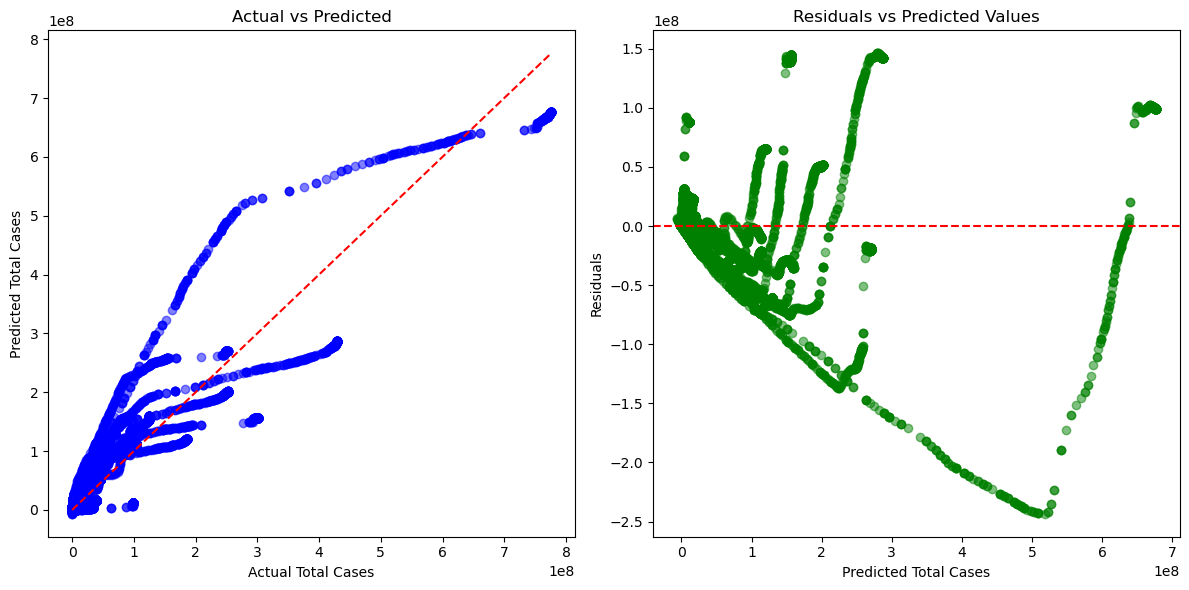

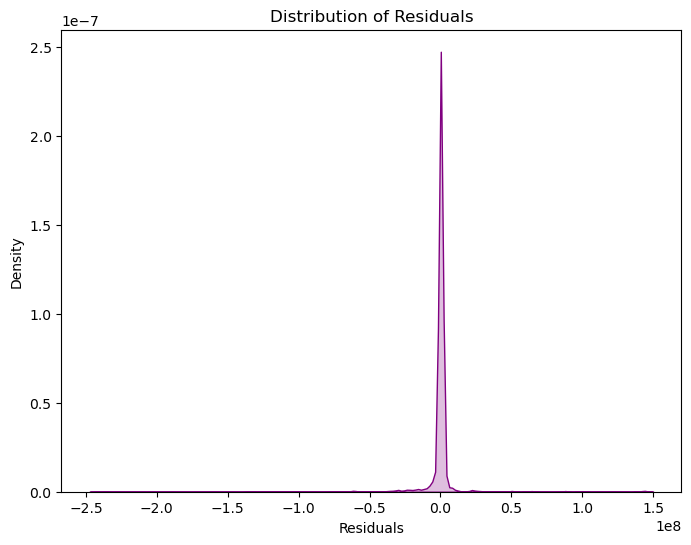

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate residuals (actual - predicted)
residuals = y_test - y_pred

# 1. Plot: Actual vs Predicted
plt.figure(figsize=(12, 6))

# Scatter plot of Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line for perfect predictions
plt.title('Actual vs Predicted')
plt.xlabel('Actual Total Cases')
plt.ylabel('Predicted Total Cases')

# 2. Plot: Residuals vs Predicted Values
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Zero line for residuals
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Total Cases')
plt.ylabel('Residuals')

# Display the plots
plt.tight_layout()
plt.show()

# 3. Plot: Distribution of Residuals
plt.figure(figsize=(8, 6))
sns.kdeplot(residuals, fill=True, color='purple')  # Updated `fill=True` instead of `shade=True`
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

Explanation:
Actual vs. Predicted Plot:

The scatter plot shows actual values (y_test) on the x-axis and predicted values (y_pred) on the y-axis.
The red dashed line represents a perfect prediction where the predicted values exactly match the actual values. Points close to this line indicate better performance.
Residuals vs. Predicted Values Plot:

The residuals are plotted against the predicted values (y_pred), where the residuals are the differences between the actual and predicted values.
Ideally, the residuals should be randomly scattered around zero with no specific patterns. If there’s a clear pattern, it may indicate model issues, such as non-linearity or incorrect model choice.
Distribution of Residuals:

The distribution of residuals is plotted using a Kernel Density Estimate (KDE). A good model should have residuals that are close to a normal distribution centered around zero, indicating no bias in the predictions.
Example Output:
Actual vs Predicted Plot: Shows how well your predictions match actual values. Points close to the red dashed line indicate good predictions.
Residuals vs Predicted Plot: Should ideally show a random scatter around the horizontal red line at zero.
Distribution of Residuals: Should ideally resemble a bell-shaped curve (normal distribution) centered around zero.